# Smart feature selection with sklearn pipelines, feature-engine, and probatus

* Gilles Verbockhaven (gilles.verbockhaven@ing.com)
* Ryan Chaves (ryan.chaves@ing.com)

## Custom transformers

Making your own transformer

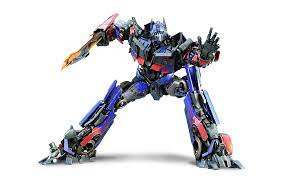

### Setup

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import pandas as pd

### Example: A transformer that drops features with low number of distinct values

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    """Remove feature with less than n distinct values."""

    def __init__(self, min_number_values):
        """Initiate the class."""
        self.min_number_values = min_number_values

    def fit(self, X, y=None):
        """Assess the features to filter out."""
        self.features_to_drop_ = []
        
        for feature in X.columns:
            number_of_distinct_values = X[feature].nunique()
            
            if number_of_distinct_values < self.min_number_values:
                self.features_to_drop_.append(feature)
    
        return self

    def transform(self, df):
        """Apply the filter."""
        return df.drop(columns=self.features_to_drop_)


In [3]:
# Tiny toy data set
df_train = pd.DataFrame({
    "constant": [1, 1, 1, 1],
    "numerical": [1, 2, 2, 1],
    "numerical_2": [1, 2, 3, 4],
    "correlated": [1.7, 4.7, 6.6, 7.8]
})

In [4]:
transformer = CustomTransformer(3)
transformer.fit_transform(df_train)

,numerical_2,correlated
0,1,1.7
1,2,4.7
2,3,6.6
3,4,7.8


In [5]:
transformer.features_to_drop_

['constant', 'numerical']

In [6]:
# Can add features beyond original features fit on
df_test = pd.DataFrame({"constant": [11], "numerical":[2], "mickey_mouse": [3]})
transformer.transform(df_test)

,mickey_mouse
0,3


In [7]:
# But careful, it expects to find original features fit on
test = pd.DataFrame({"cst": [11], "numerical":[2], "mickey_mouse": [3]})
transformer.transform(test)

KeyError: "['constant'] not found in axis"

### Going further

*Did you know?*

You can also transform any arbitrary function into a transformer using `sklearn.preprocessing.FunctionTransformer`.

See the excellent `sklearn` docs for details and an example of a `np.log` transformer: https://scikit-learn.org/stable/modules/preprocessing.html#custom-transformers

End of this notebook.